In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import statsmodels.api as sm #　sckitlernでも可　機械学習というより今回は統計処理メインなのでこっち使用
import statsmodels.formula.api as smf   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 線形回帰分析

+ 基本的な重回帰分析の説明
+ ダミー変数
+ 重回帰分析の実行
+ Formula APIを用いた重回帰分析の実行
+ モデルを使用した未来予測
+ グラフの作成
+ 特徴量エンジニアリング（対数変換、交互作用）
+ 正則化項の追加（Lasso回帰、Ridge回帰、Elastic Net）

# 回帰分析


In [ ]:
#　csv　読み込み
df_sales = pd.read_csv("2_1/sales_sample.csv")

In [ ]:
df_sales

雨を 1 それ以外を0にする

In [ ]:
df_sales["雨"]

In [ ]:
# ダミー変数の用意
pd.get_dummies(df_sales["雨"])

In [ ]:
# ダミー変数の作成

df_sales["雨_ダミー"] = pd.get_dummies(df_sales["雨"])

In [ ]:
df_sales

In [ ]:
df_sales["雨_ダミー"] = df_sales["雨_ダミー"].astype(int)

In [ ]:
df_sales

# 



# Formula API を使わない方法

In [ ]:
# Formula API を使わない方法

## 気温　単価　アメダミー
X = df_sales[["気温","単価","雨_ダミー"]]#説明変数

##　目的変数
y =df_sales ["売上"]

# OLS 最小二乗法    (目的変数　, 説明変数)
model = sm.OLS(y,X)

# 線形回帰
result = model.fit()

# 結果の表示
result.summary()


# p と　coefを見てみる
# p値　0.05以下であれば重要　説明変数について「目的変数に関係性がある」と判断
# 売上　= 45.8 ✖️　気温　＋ 151.9 ✖️ 雨　＋　
# のように売上を推測できる　という意味


# y= a1・x1 +  a2・x2   +  ・・・   +　b 




In [ ]:
# y= a1・x1 +  a2・x2   +  ・・・   +　b のように切片を追加

## 気温　単価　アメダミー
X = df_sales[["気温","単価","雨_ダミー"]]#説明変数

##　目的変数
y =df_sales ["売上"]

# OLS 最小二乗法    (目的変数　, 説明変数)
model = sm.OLS(y,sm.add_constant(X))

# 線形回帰
result = model.fit()

# 結果の表示
result.summary()

# constが　b

# 切片のp値が高くても　関係がないとはならない

# こっちでも単価は関係なさそう


In [ ]:
## 気温　雨ダミー　のみにする　　　  単価を抜く
X = df_sales[["気温","雨_ダミー"]]#説明変数

##　目的変数
y =df_sales ["売上"]

# OLS 最小二乗法    (目的変数　, 説明変数)
model = sm.OLS(y,sm.add_constant(X))# 切片入れる

# 線形回帰
result = model.fit()

# 結果の表示
result.summary()




## 単価を入れるのと入れないのどっちがいいモデル？


Adjusted (Adj.) R-squared:
自由度調整済み決定係数

高い方がモデルがいまくできてる　fitting






# 回帰分析の実行 (Formula API) を使う方法


~ 特徴量エンジニアリング ~



In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 +雨_ダミー")

# 線形回帰
result = model.fit()

# 結果
result.summary()

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 +雨_ダミー")

# 線形回帰
result = model.fit()

# 結果
result.summary()

現在一つの要因だけみてるが




気温が高くて　

かつ

雨降ってる


単価が高くてかつ雨降ってて

とか複数が絡み合う可能性もある


交互作用

In [ ]:
df_sales["気温*単価"]  = df_sales["気温"]*df_sales["単価"]
#とかしてデータフレームを作ってモデルを作成するとかは面倒

In [ ]:



# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 : 単価 +雨_ダミー")

# 線形回帰
result = model.fit()

# 結果
result.summary()




In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 * 単価 +雨_ダミー")

# 線形回帰
result = model.fit()

# 結果
result.summary()

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 * 単価 * 雨_ダミー")

# 線形回帰
result = model.fit()

# 結果
result.summary()

対数変換したい時がある

y = ax +  b     モデル

yに対数変換した値を使うと
「xが1%増えると　yがa%上がる」といった解釈ができる
(価格弾性力：価格を1%上た時の需要の変化率)



In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + np.log(単価) + 雨_ダミー")

# 線形回帰
result = model.fit()

# 結果
result.summary()

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + np.log(単価) + 雨_ダミー -1") #切片を抜きたい場合は-1 

# 線形回帰
result = model.fit()

# 結果
result.summary()


# 変数名にスペース　入れない　　　半角数字　入れない　　全角ならあり

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 雨_ダミー") #切片を抜きたい場合は-1 

# 線形回帰
result = model.fit()

# 結果
result.summary()

完了
+ 基本的な重回帰分析の説明
+ ダミー変数
+ 重回帰分析の実行
+ Formula APIを用いた重回帰分析の実行
+ 特徴量エンジニアリング（対数変換、交互作用）



+ モデルを使用した未来予測
+ グラフの作成
+ 正則化項の追加（Lasso回帰、Ridge回帰、Elastic Net）


# モデルを使用した未来予測

過去から法則を見出した
来月　どうなるの？

In [ ]:
# 予測

df_sales_pred = pd.read_csv("2_1/sales_sample_pred.csv")

In [ ]:
df_sales_pred

In [ ]:

result.predict(df_sales_pred) # モデルから売上予想

In [ ]:
df_sales.sort_values("気温") #　気温が低い順　   グラフ化する時に　線があっち行ったりこっち行ったりしないように

In [ ]:
# グラフの確認

sns.set()
plt.figure(figsize=(10,8))

df_sales_sorted = df_sales.sort_values("気温") # 気温の低い順

df_sales_sorted_0 = df_sales_sorted[df_sales_sorted["雨_ダミー"]== 0]
df_sales_sorted_1 = df_sales_sorted[df_sales_sorted["雨_ダミー"]== 1]


# 雨が降っていない　晴れている場合
#x 気温  y 売上　　　o 点　  *-  バッテンを直線で繋ぐ　  青色　b    
plt.plot(df_sales_sorted_0["気温"], df_sales_sorted_0["売上"] ,"o", color="b")
plt.plot(df_sales_sorted_0["気温"], result.predict(df_sales_sorted_0[["気温","雨_ダミー"]]) ,"*-", color="b")


# 雨が降っている場合

plt.plot(df_sales_sorted_1["気温"], df_sales_sorted_1["売上"] ,"o", color="r")
plt.plot(df_sales_sorted_1["気温"], result.predict(df_sales_sorted_1[["気温","雨_ダミー"]]) ,"*-", color="r")


完了
+ 基本的な重回帰分析の説明
+ ダミー変数
+ 重回帰分析の実行
+ Formula APIを用いた重回帰分析の実行
+ 特徴量エンジニアリング（対数変換、交互作用）


完了
+ モデルを使用した未来予測
+ グラフの作成



+ 正則化項の追加（Lasso回帰、Ridge回帰、Elastic Net）

#   Lasso回帰、Ridge回帰、Elastic Net

Lasso回帰(L1正則化)

Ridge回帰(L2正則化)

52:35

今は変数少ない
説明変数　20個　とか　100個



In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=1,alpha=0.1)

result.params


# 切片の係数
# 気温の係数
#
#

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=1,alpha=1)

result.params


# alphaを増やしていくと　0 のやつが増えていく

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=1,alpha=100)

result.params

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=1,alpha=10000)

result.params

# いらない変数を０にしていく

# ある程度自動で選定できる　

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=1,alpha=80)

result.params

さっきと結果が違うが　使用する手法によって　何が必要な変数かも変わってくる

Ridge回帰(L2正則化)



多重共線性（マルチコ）


雨　と　湿度　みたいに元から関連性がありそうなものが含まれていると　うまく動かない

説明変数間で強い相関を持つペアがあるとよくない




多少

相関係数
が高いものがある場合　変数を減らしたいが　どっちも使いたい場合もある


そういう時に

L2正則化を使う


In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1を0にすれば　L2
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=0,alpha=10) # alphaによって変わる。。。

result.params

#   切片         気温         単価         雨_ダミー  　　の係数





lasso  説明変数の選定ができる　　相関が強いとうまく働かない
Ridge  L2　　多重共線性には対応できる(相関強くてもOK) 　　説明変数の選定はしない

Elastic Net  どっちものいいとこ取り

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1_wtを0~1にすれば　elastic net    lassoを強くするなら　0  ridgeを強うくするなら 1
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=0.5,alpha=0.2) # alphaによって変わる。。。

result.params

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1_wtを0~1にすれば　elastic net    lassoを強くするなら　1  ridgeを強うくするなら 0
# alpha 大きいほど　説明変数の選択を厳しくする
result = model.fit_regularized(L1_wt=0.5,alpha=10) # alphaによって変わる。。。

result.params

In [ ]:
# 最小二乗法
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 

# L1_wt=1なら　alphaを調整して　説明変数が少なくなればいいなですむが
# L1_wt=0なら　alphaを調整しても　結果が全て変わるし、何が一番いいかの判別がつきにくい
result = model.fit_regularized(L1_wt=1,alpha=10) # alphaによって変わる。。。

result.params

In [ ]:
# Mean Squared Error(平均二乗誤差)
from sklearn.metrics import mean_squared_error

In [ ]:
df_sales

In [ ]:
result.predict()#36行についての　売上　予測値が入っている

In [ ]:
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 
result = model.fit_regularized(L1_wt=0,alpha=0.1) 
print(result.params)

mean_squared_error(result.predict(),df_sales["売上"])# 予想した値と実際の値の差の二乗

#二乗したので平方根をとる
np.sqrt(mean_squared_error(result.predict(),df_sales["売上"]))

# RMSE Root Mean Squared Error(二乗平均平方根誤差)
# 小さいほど優秀

In [ ]:
model= smf.ols(data=df_sales,formula="売上 ~ 気温 + 単価 + 雨_ダミー") #切片を抜きたい場合は-1 
result = model.fit_regularized(L1_wt=0.5,alpha=0.01) 
print(result.params)

mean_squared_error(result.predict(),df_sales["売上"])# 予想した値と実際の値の差の二乗

#二乗したので平方根をとる
np.sqrt(mean_squared_error(result.predict(),df_sales["売上"]))

# RMSE Root Mean Squared Error(二乗平均平方根誤差)
# 小さいほど優秀


# ロジスティック回帰

ホームページ滞在時間　によって　
ゲームに登録したかどうか
を考えてみる


ゲームに登録したかどうか        0か１　　     y軸

ホームページ滞在時間　　x軸　変わる


ロジスティック曲線で近似させる


In [ ]:
df_user = pd.read_csv("2_1/user_sample.csv")
df_user # ダミー変数の要素３以上なら２列にする　　　晴れ　1 0     曇り　 1  0　 （どれにも当てはまらない　雨かな？）


# 

##        Formula APIを使わない   ロジスティック回帰

In [ ]:
X = df_user[["性別","学生","滞在時間"]]#説明変数
y = df_user["登録"]

model = sm.Logit(y,sm.add_constant(X)) # ロジスティック回帰
result = model.fit()
result.summary()

# ロジスティック回帰　Formula APIを使う方法

In [ ]:

# glm 一般化線形モデル　線形以外の回帰分析をしたい時にglm 「直線じゃない時」
# family 確率分布 二項分布を指定　0or1

model = smf.glm(data=df_user,formula="登録 ~ 性別 + 学生 + 滞在時間 + 1", family = sm.families.Binomial())

result=model.fit()
result.summary()


In [ ]:
result.aic # AIC 赤池情報量基準  モデルのフィッティング具合をはかる指標の１個 指標が小さい方が当てはまりがいい

In [ ]:
model = smf.glm(data=df_user,formula="登録 ~ 性別  + 滞在時間 + 1", family = sm.families.Binomial())

result=model.fit()
result.summary()

In [ ]:
result.aic

In [ ]:
model = smf.glm(data=df_user,formula="登録 ~  学生 + 滞在時間 + 1", family = sm.families.Binomial())

result=model.fit()
result.summary()

In [ ]:
result.aic

# 

In [57]:
# モデルを使用した予測
df_user_pred = pd.read_csv("2_1/user_sample_pred.csv")

In [59]:
df_user_pred 

,性別,学生,滞在時間
0,0,1,67
1,0,0,80
2,1,0,19
3,0,1,92
4,1,1,56
5,0,0,42
6,0,0,98
7,1,1,78
8,1,0,90
9,0,1,66


In [ ]:
result.predict(df_user_pred) # 予測値 0~1 登録するかしないか　確率

0    0.617041
1    0.292847
2    0.034132
3    0.815431
4    0.508296
5    0.082051
6    0.461241
7    0.715211
8    0.382695
9    0.607463
dtype: float64

 #

# ポアソン回帰分析

ポアソン分布

１年あたりの大型台風の回数



台風　何回も起こるものではない



0回　１回　２回　　　　　x軸　　　　ヒストグラム　にする　正規分布ではない　初めの方がもっこり　　
よくある



営業活動

成約回数　y軸

3回
　　　　　　　　　　　　　多いかも
2回

１回

　　　少ない　　　　　　　　　　　　　少ない
 
    10    20    30         100     訪問回数 


直線もおかしい
ロジスティック曲線もおかしい

曲線


データによって変わる

In [60]:
df_contract = pd.read_csv("2_1/contract_sample.csv")

In [61]:
df_contract

,氏名,訪問回数,メール送信,成約数
0,Aさん,32,0,0
1,Bさん,56,1,3
2,Cさん,42,1,1
3,Dさん,36,0,1
4,Eさん,60,0,0
5,Fさん,29,1,1
6,Gさん,29,0,0
7,Hさん,43,0,1
8,Iさん,56,1,1
9,Jさん,43,0,0


##        Formula APIを使わない　　ポアソン回帰分析

In [ ]:
X = df_contract[["訪問回数","メール送信"]]#説明変数 
y=df_contract["成約数"]


# GLM 一般化線形モデル　　　リンク関数　　log
model = sm.GLM(y,X,family=sm.families.Poisson())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    成約数   No. Observations:                   52
Model:                            GLM   Df Residuals:                       50
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.907
Date:                Tue, 10 Dec 2024   Deviance:                       44.273
Time:                        11:44:45   Pearson chi2:                     35.1
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3432
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
訪問回数          -0.0059      0.004     -1.319      0.187      -0.015       0.003
メール送信          1.0778      0.250      4.310      0.000       0.588       1.568
==============================================================================
"""

## Formula API　　　　　ポアソン回帰分析

In [63]:
# Formula API
model = smf.glm(data=df_contract,
                formula="成約数 ~ 訪問回数 + メール送信 + 1", 
                family = sm.families.Poisson())

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    成約数   No. Observations:                   52
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.097
Date:                Tue, 10 Dec 2024   Deviance:                       36.652
Time:                        11:47:08   Pearson chi2:                     31.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4327
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5568      0.581     -2.679      0.007      -2.696      -0.418
訪問回数           0.0256      0.012      2.067      0.039       0.001       0.050
メール送信          1.1671      0.276      4.228      0.000       0.626       1.708
==============================================================================
"""

In [64]:
result.aic

np.float64(130.1934628570886)

# グラフの確認

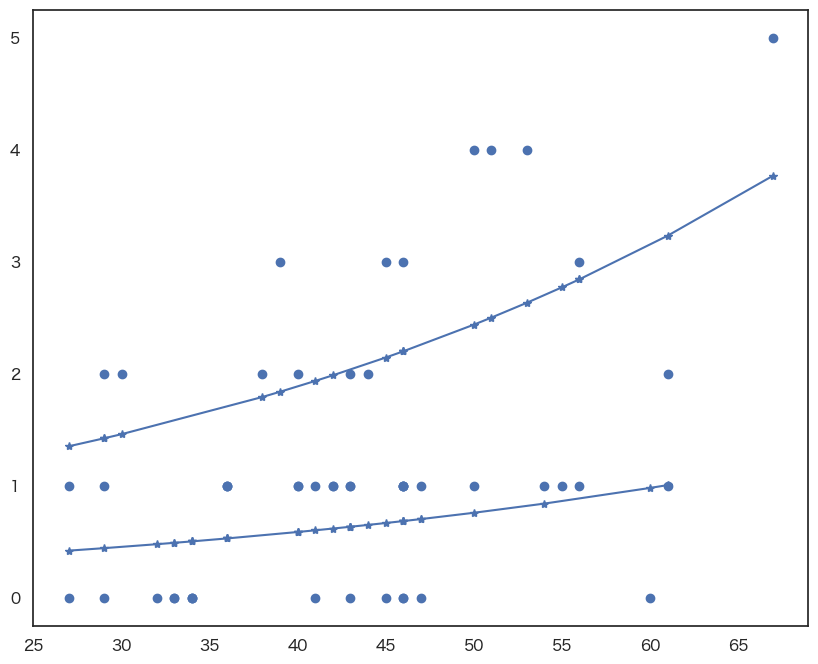

In [ ]:
sns.set(font="Hiragino Sans",context="notebook",style="white")
plt.figure(figsize=(10,8))

df_contract_sorted = df_contract.sort_values("訪問回数")

df_contract_sorted_0 =  df_contract_sorted[df_contract_sorted["メール送信"] == 0 ]
df_contract_sorted_1 =  df_contract_sorted[df_contract_sorted["メール送信"] == 1 ]

plt.plot(df_contract_sorted_0["訪問回数"],df_contract_sorted_0["成約数"],"o",color = "b")
plt.plot(df_contract_sorted_0["訪問回数"],result.predict(df_contract_sorted_0),"*-",color = "b")

plt.plot(df_contract_sorted_1["訪問回数"],df_contract_sorted_1["成約数"],"o",color = "b")
plt.plot(df_contract_sorted_1["訪問回数"],result.predict(df_contract_sorted_1),"*-",color = "r")




線で結ばれたところが、予測  　　　 まる　実測値

発生確率が少ない場合、ポアソン確率

